In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install geopandas
!pip install contextily
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 47.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 27.5 MB/s eta 0:00:00


In [ ]:
comuni = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/Com01012022_WGS84.zip')
province = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/ProvCM01012022_WGS84.zip')
regioni = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/Reg01012022_WGS84.zip')
ripgeo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Dataset/RipGeo01012022_WGS84.zip')
quartieri = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/POLISENO RICCARDO - ds964_nil_wm.zip')

In [ ]:
from shapely.geometry import Polygon

1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia
2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa (https://contextily.readthedocs.io/en/latest/providers_deepdive.html)

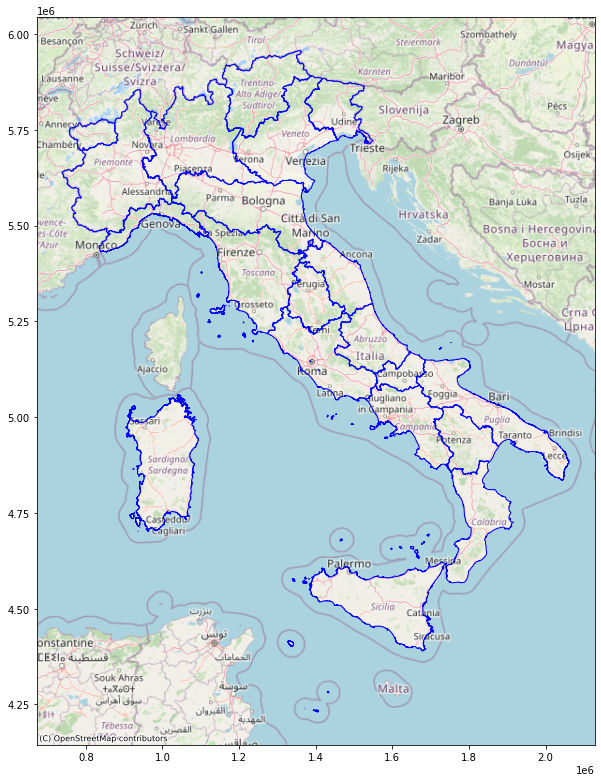

In [ ]:
regioni3857 = regioni.to_crs(3857)
ax = regioni3857.plot(figsize=(10,20), facecolor='None', edgecolor='Blue')
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

3. visualizzare le province della Lombardia su una mappa di contextily

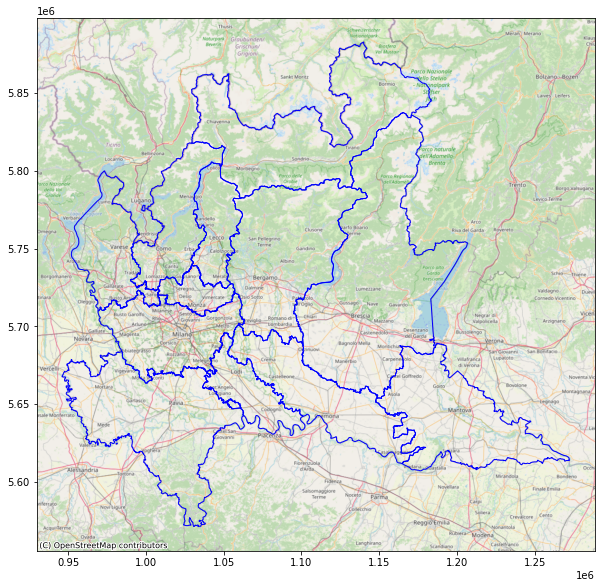

In [ ]:
province3857 = province.to_crs(3857)
lombardia = regioni3857[regioni3857.DEN_REG	== 'Lombardia'].geometry.item()
provincelombardia = province3857[province3857.within(lombardia)]
ax = provincelombardia.plot(figsize=(10,20), facecolor='None', edgecolor='Blue')
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)

4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

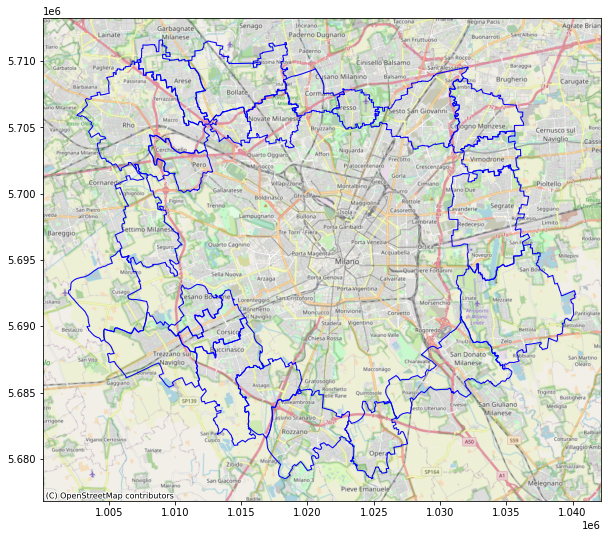

In [ ]:
comuni3857 = comuni.to_crs(3857)
milanzo = comuni3857[comuni3857.COMUNE== 'Milano'].geometry.item()
confini =  comuni3857[comuni3857.touches(milanzo)]
ax = confini.plot(figsize=(10,20), facecolor='None', edgecolor='Blue')
contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik)


5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 


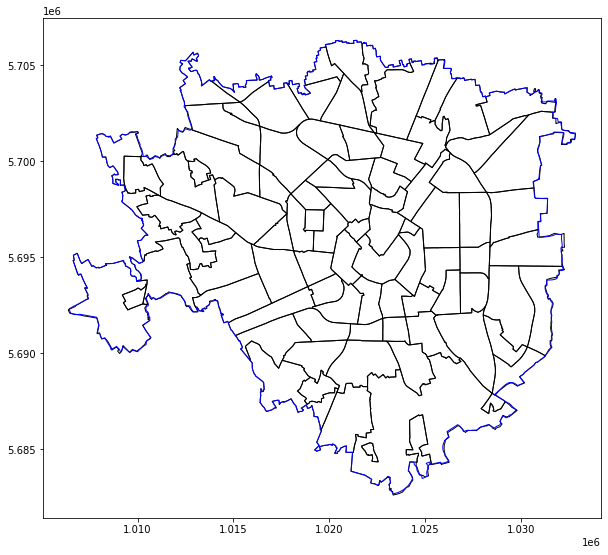

In [ ]:
milano = comuni3857[comuni3857.COMUNE== 'Milano']
quartieri3857 = quartieri.to_crs(3857)
ax = quartieri3857.plot(figsize=(10,20), facecolor='None', edgecolor='Black')
milano.plot(ax = ax, figsize=(10,20), facecolor='None', edgecolor='Blue')

6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.

Inserisci una provincia della Lombardia: Lecco


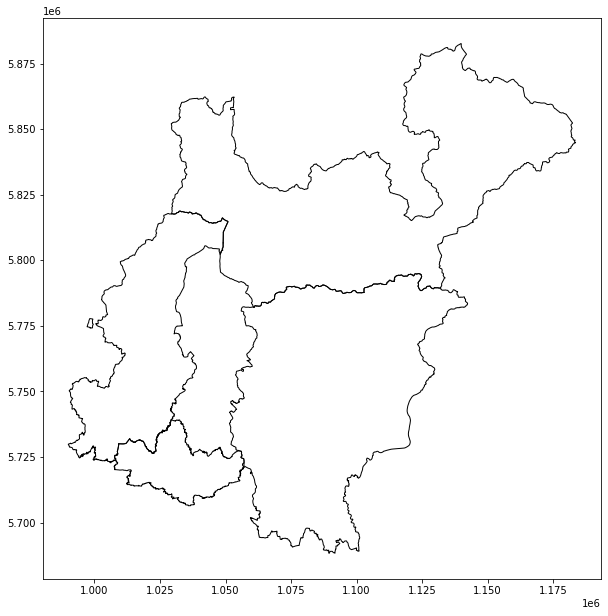

In [ ]:
inprovincia = str(input('Inserisci una provincia della Lombardia: '))
checklombardia = province3857[province3857.DEN_UTS == inprovincia].within(lombardia).bool()
if checklombardia == True:
  provincelombardeconfinanti = province3857[province3857.touches(province3857[province3857.DEN_UTS == inprovincia].geometry.item())]
  ax = provincelombardeconfinanti.plot(figsize=(10,20), facecolor='None', edgecolor='Black')
else:
  print('La provincia non si trova in Lombardia, stacce.')